<a href="https://colab.research.google.com/github/gowrisrivani/GowriSriVani_AI_ML/blob/main/AIML_Module_1_Lab_2_Machine_learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 2
# Machine learning terms and metrics


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [ ]:
 dataset =  datasets.fetch_california_housing()
 print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<ipython-input-4-d89ecb46a347>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 0.1/100) #orginally 75/100
                                                                                      #increased 95/100
                                                                                      #decreased 55/100
                                                                                      # extreme values like 99.9/100
                                                                                      # extreme values like 0.1/100

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)   #orginally 1.0
                                                                     # always 1 no matter if percentage of validation set is increased or not
trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)   #orginally 0.164375
                                                                     # when 95/100 the value is 0.162531
                                                                     # when 55/100 the value is 1.6809
                                                                     # when extreme values like 99.9/100 the value is 0.17140
                                                                     # when extreme values like 0.1/100 the value is 0.04347826

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.043478260869565216


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)    #orginally 0.34108
                                                                         # when 95/100 the value is 0.34579
                                                                         # when 55/100 the value is 0.33262
                                                                         # when extreme values like 99.9/100 the value is 0.46666
                                                                         # when extreme values like 0.1/100 the value is 0.2873186

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)     #orginally 0.16884
                                                                          # when 95/100 the value is 0.1682242
                                                                          # when 55/100 the value is 0.168246
                                                                          # when extreme values like 99.9/100 the value is 0.1333
                                                                          # when extreme values like 0.1/100 the value is 0.16481

Validation accuracy using nearest neighbour is  0.2873186426273296
Validation accuracy using random classifier is  0.1664541977781825


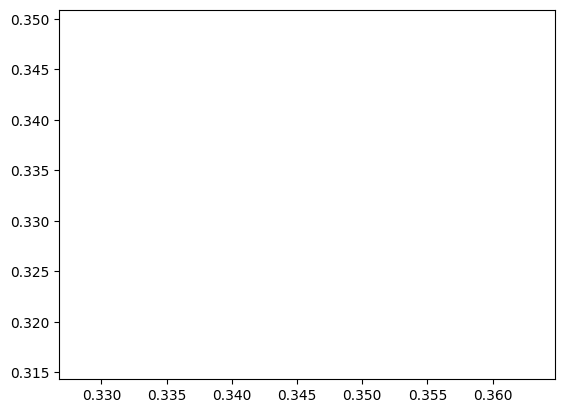

In [ ]:
plt.plot(0.34579,0.33262)

Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

1. The accuracy of validation set increases with increase in percentage of validation set and decreases with decrease in percentage of validation set.

2. If the train set is too small then the model will not have enough data to learn, If the validation data is too small then the model cannot get to test on all kind of varieties available in data set resulting in wrong accuracy.

3. Having 20% of data for validation will be good and the remaining 80% (60% for training, 20% for testing) will be a preferable choice.

In case of extreme splits the accuracy values vary very much,for extreme higher split value like 99.9 the accuracy is also high and for extreme lower split value like 0.1 the accuracy is also lower.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3418177623741312
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


1. Yes, averaging the validation accuracy across multiple splits gives more consistent results because variability of data (other values of features) are considered.

2. Yes, it gives more accurate test accuracy because the model isn't aware of the data that is used for validation and it works similar like testing.

3. We get a higher estimate of accuracy with more iterations.

4. We can do it but we may come across overfitting.